<a href="https://colab.research.google.com/github/TanmayVasishta/ML-Labs-TanmayVasishta1WA23CS012/blob/main/ML_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Load dataset
df = pd.read_csv("/housing.csv")
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
print("INFO:")
df.info()

print("\nDESCRIBE:")
df.describe()


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

DESCRIBE:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


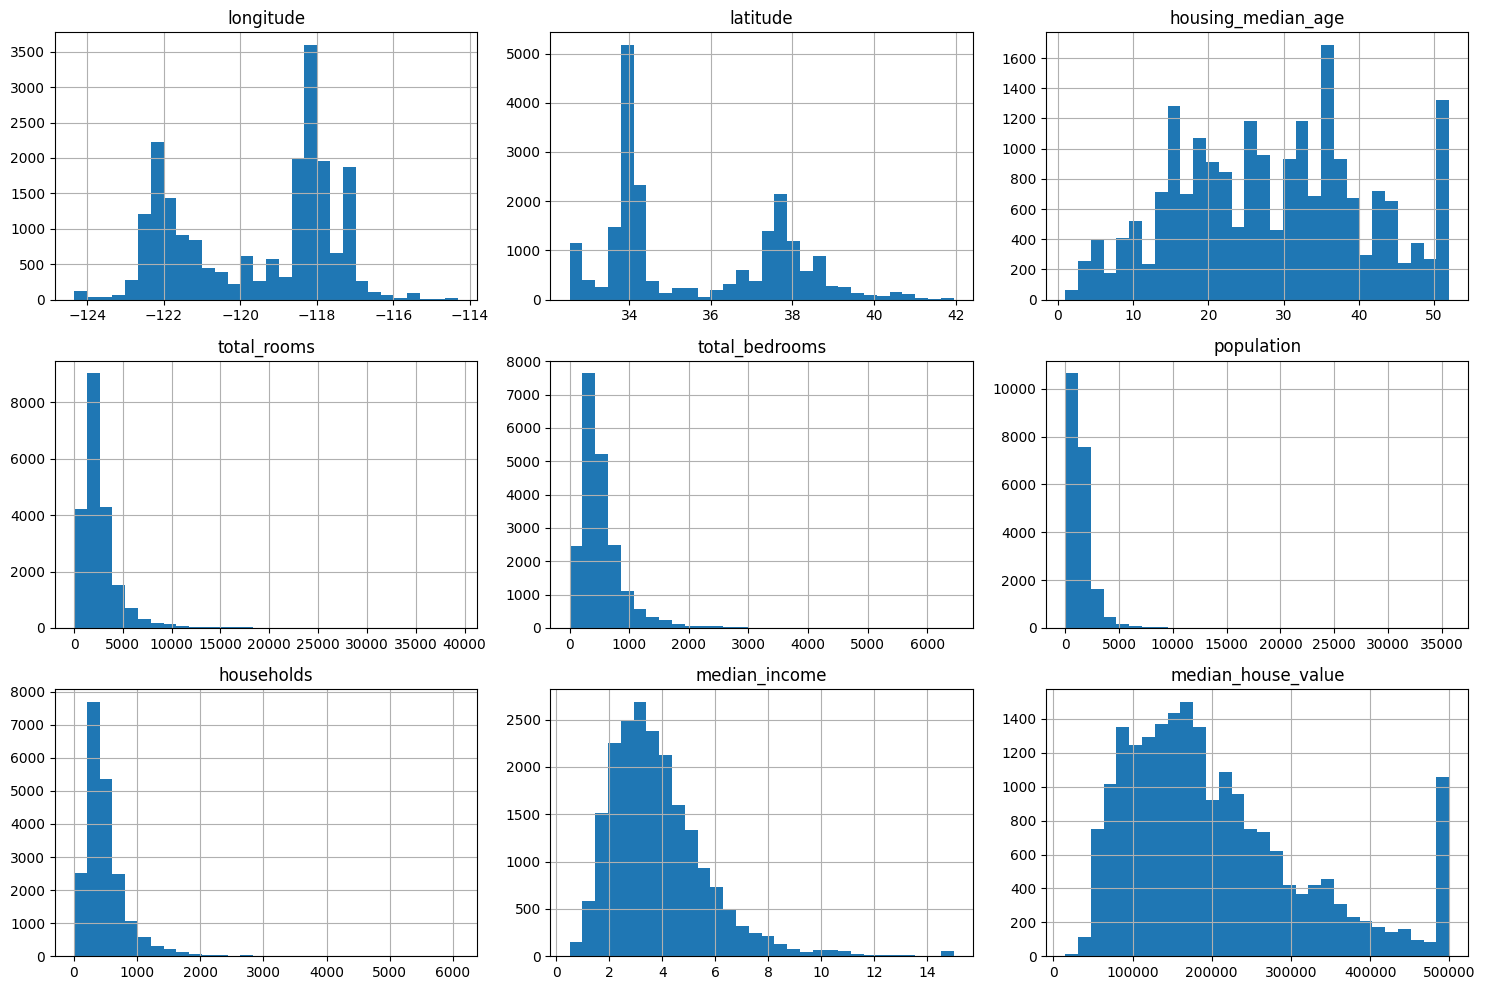

In [14]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


In [15]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Train size:", len(train_set))
print("Test size:", len(test_set))


Train size: 16512
Test size: 4128


In [16]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0.,1.5,3.0,4.5,6.,np.inf],
                          labels=[1,2,3,4,5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print("Stratified Train size:", len(strat_train_set))
print("Stratified Test size:", len(strat_test_set))


Stratified Train size: 16512
Stratified Test size: 4128


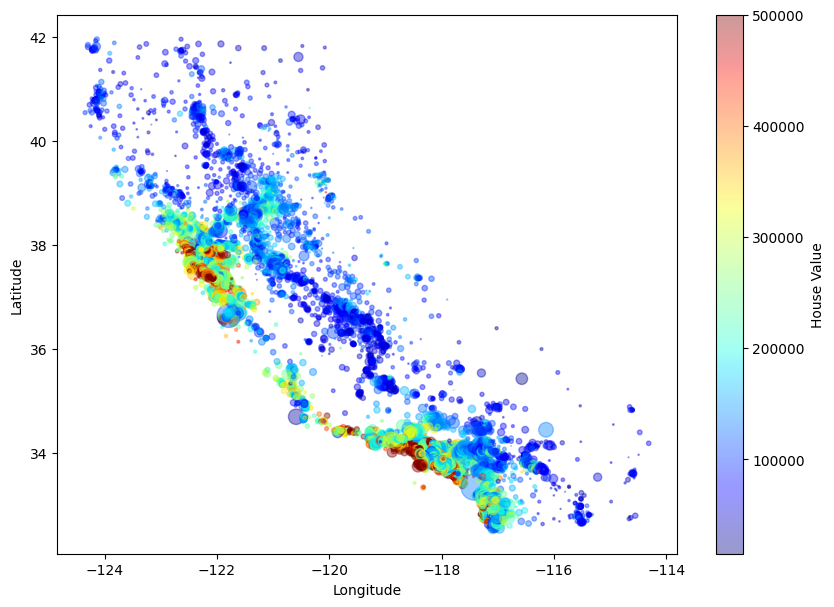

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(df["longitude"], df["latitude"],
            alpha=0.4,
            s=df["population"]/100,
            c=df["median_house_value"],
            cmap=plt.get_cmap("jet"))

plt.colorbar(label="House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


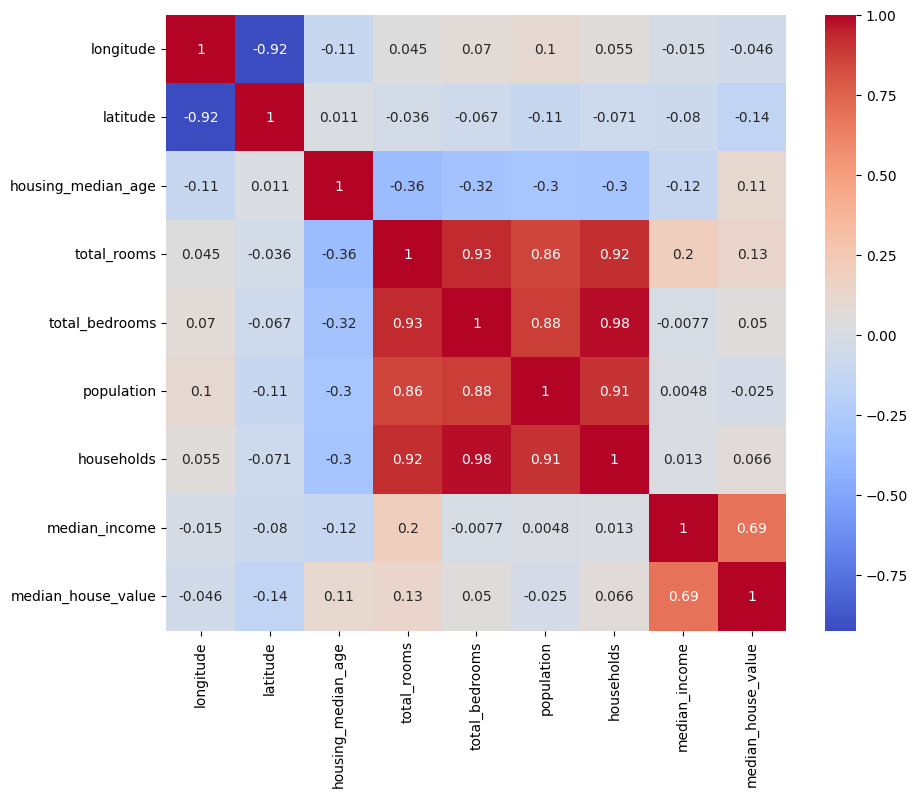

In [18]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


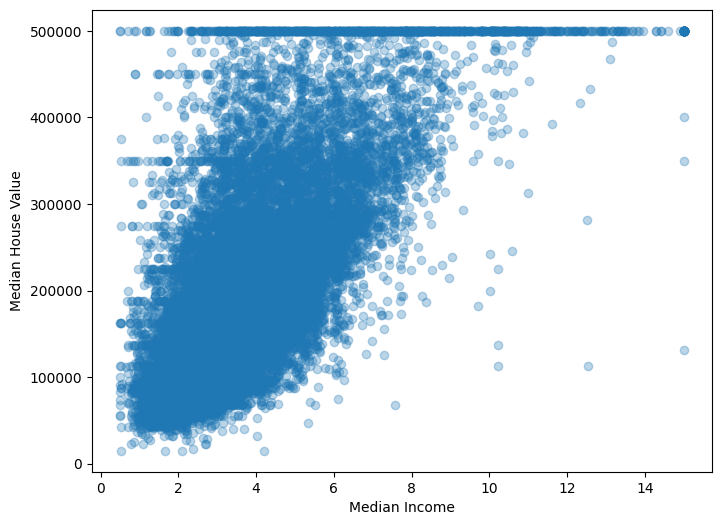

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [21]:
df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [22]:
imputer = SimpleImputer(strategy="median")

housing_num = df.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

X = imputer.transform(housing_num)

df_tr = pd.DataFrame(X, columns=housing_num.columns)
df_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [23]:
df_cat = df[["ocean_proximity"]]

encoder = OneHotEncoder()
df_cat_encoded = encoder.fit_transform(df_cat)

print("Categories:", encoder.categories_)
print("Encoded shape:", df_cat_encoded.shape)


Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
Encoded shape: (20640, 5)


In [24]:
scaler = StandardScaler()

housing_scaled = scaler.fit_transform(df_tr)

housing_scaled[:5]


array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.9744286 , -0.97703285,  2.34476576,  2.12963148,  1.89012782],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         0.86143887,  1.66996103,  2.33223796,  1.31415614,  1.89012782],
       [-1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82702426,
        -0.82077735, -0.84363692,  1.7826994 ,  1.25869341,  1.89012782],
       [-1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71972345,
        -0.76602806, -0.73378144,  0.93296751,  1.16510007,  0.94189394],
       [-1.33781784,  1.03850269,  1.85618152, -0.46240395, -0.61242263,
        -0.75984669, -0.62915718, -0.012881  ,  1.17289952, -0.00633994]])

In [26]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,
                         population_per_household]


In [27]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(df)

housing_prepared.shape


(20640, 18)